In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from functools import partial

In [4]:
from paths import CAR_IMAGES_DIR  # YOU NEED TO GO TO THE paths.py FILE AND PUT YOUR FOLDER OF IMAGES

In [5]:
INDIVIDUAL_IMG_PATHS = [CAR_IMAGES_DIR / image_name for image_name in os.listdir(CAR_IMAGES_DIR)]

In [6]:
print(INDIVIDUAL_IMG_PATHS[23])

/home/adrian/Documents/academia/UAB/year_3/vision_learning/project1/archive/images/Cars329.png


In [8]:
def binary_methods(image_path, method = 'simple'):
    image = cv.imread(str(image_path))

    # Convert the image from BGR to RGB
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image_gray = cv.cvtColor(image_rgb, cv.COLOR_RGB2GRAY)

    blur = cv.GaussianBlur(image_gray, (5, 5), 0)

    if method == 'original':
        return image_rgb
    
    if method == 'simple':
        binary__image = cv.threshold(blur, 127, 255, 0)[1]

    elif method == 'adaptive':
        binary__image = cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

    elif method == 'otsu':
        _, binary__image = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

    elif method == 'Gaus_otsu':
        _, binary__image = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

    return binary__image

In [9]:
def plot_car():
    plt.figure(figsize=(15, 10))   # (width, height)
    methods = ['original', 'simple', 'adaptive', 'otsu', 'Gaus_otsu']
    
    for i in range(len(methods) * 3):
        pos = i % len(methods)
        if (pos == 0):
            image_path = random.choice(INDIVIDUAL_IMG_PATHS)
            
        image = binary_methods(image_path, method=methods[pos])
        plt.subplot(3, len(methods), i+1)
        plt.imshow(image, 'gray')
        plt.title(methods[pos])
        plt.xticks([]),plt.yticks([])
    
    plt.show()

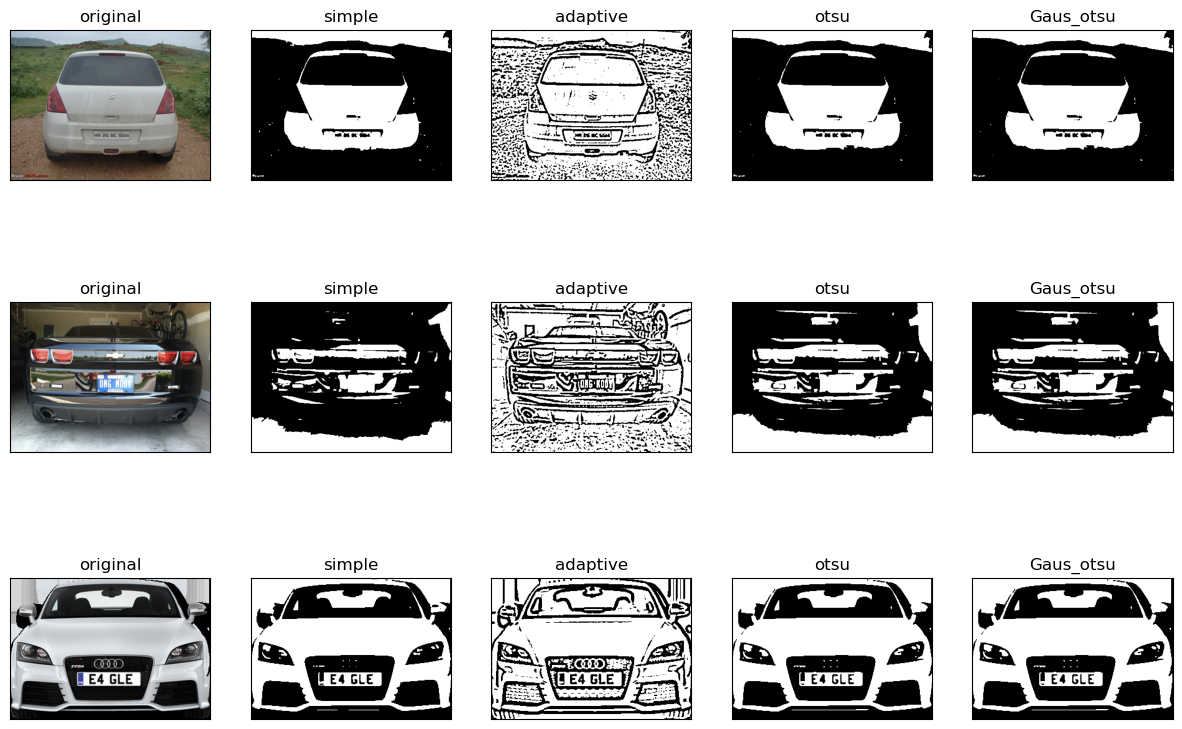

In [10]:
plot_car()

In [11]:
def mhorp_operations():
    pass

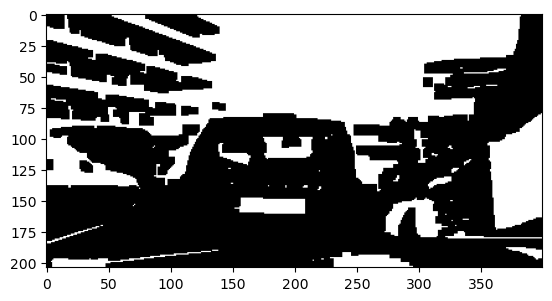

In [12]:
kernel = np.ones((6,6), np.uint8)  # 5x5 rectangular structuring element

image = cv.imread(str(INDIVIDUAL_IMG_PATHS[25]))

    # Convert the image from BGR to RGB
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_gray = cv.cvtColor(image_rgb, cv.COLOR_RGB2GRAY)
binary_image = cv.threshold(image_gray, 127, 255, 0)[1]

dilated_image = cv.morphologyEx(binary_image, cv.MORPH_CLOSE, kernel)

plt.imshow(dilated_image, "gray")

In [13]:
canny = cv.Canny(dilated_image, 120, 255, 1)

# Find contours
cnts = cv.findContours(canny, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Iterate thorugh contours and draw rectangles around contours
for c in cnts:
    x,y,w,h = cv.boundingRect(c)
    cv.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)

"""
cv.imshow('canny', canny)
cv.imshow('image', image)
cv.imwrite('canny.png', canny)
cv.imwrite('image.png', image)
cv.waitKey(0)
"""

"\ncv.imshow('canny', canny)\ncv.imshow('image', image)\ncv.imwrite('canny.png', canny)\ncv.imwrite('image.png', image)\ncv.waitKey(0)\n"

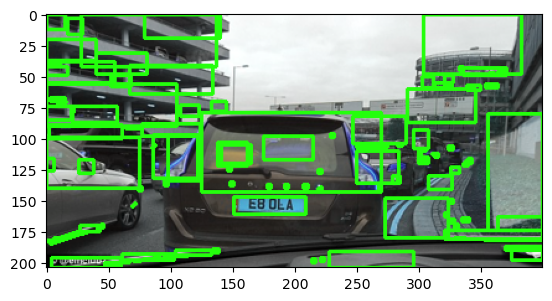

In [14]:
plt.imshow(image)

In [15]:
# Initialize an all-black image (mask)
mask = np.zeros_like(image)

# Iterate through contours and draw filled rectangles on the mask
for c in cnts:
    x, y, w, h = cv.boundingRect(c)
    cv.rectangle(mask, (x, y), (x + w, y + h), (255, 255, 255), -1)  # -1 means fill the rectangle

# If you want to apply this mask to the original image:
result = cv.bitwise_and(image, mask)

# Display the mask and result
cv.imshow('Mask', mask)
cv.imshow('Result', result)
cv.waitKey(0)
cv.destroyAllWindows()

libGL error: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: iris
libGL error: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: iris
libGL error: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: swrast
